
## Koch Curve
---



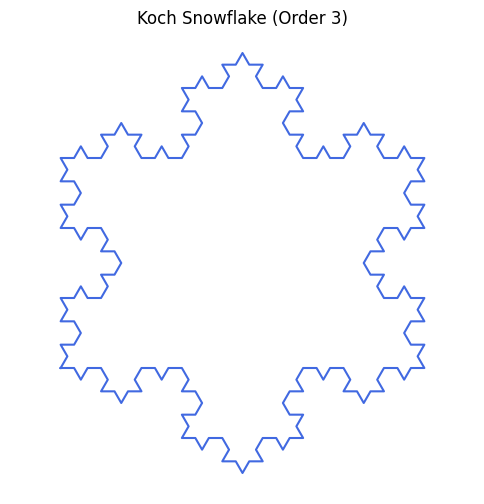

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def koch_curve(p1, p2, order):
    if order == 0:
        return [p1, p2]
    else:
        p1 = np.array(p1)
        p2 = np.array(p2)

        # Points dividing the line into thirds
        one_third = p1 + (p2 - p1) / 3
        two_third = p1 + 2 * (p2 - p1) / 3

        # Create equilateral triangle peak
        direction = two_third - one_third
        length = np.linalg.norm(direction)
        angle = np.arctan2(direction[1], direction[0]) - np.pi / 3
        peak = one_third + length * np.array([np.cos(angle), np.sin(angle)])

        # Recursively divide the segments
        return (
            koch_curve(p1, one_third, order - 1) +
            koch_curve(one_third, peak, order - 1)[1:] +
            koch_curve(peak, two_third, order - 1)[1:] +
            koch_curve(two_third, p2, order - 1)[1:]
        )

def draw_koch_snowflake(order):
    # Define the initial equilateral triangle
    p1 = [0, 0]
    p2 = [1, 0]
    height = np.sqrt(3) / 2
    p3 = [0.5, height]

    # Generate Koch curve for each side
    points = []
    points += koch_curve(p1, p2, order)[:-1]
    points += koch_curve(p2, p3, order)[:-1]
    points += koch_curve(p3, p1, order)

    # Plot
    points = np.array(points)
    plt.figure(figsize=(6, 6))
    plt.plot(points[:, 0], points[:, 1], color='royalblue')
    plt.axis('equal')
    plt.axis('off')
    plt.title(f'Koch Snowflake (Order {order})')
    plt.show()

# Example usage
draw_koch_snowflake(order=3)


In [ ]:
import os
import imageio
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm


def koch_curve(p1, p2, order):
    if order == 0:
        return [p1, p2]
    else:
        p1 = np.array(p1)
        p2 = np.array(p2)

        # Points dividing the segment
        one_third = p1 + (p2 - p1) / 3
        two_third = p1 + 2 * (p2 - p1) / 3

        # Create equilateral triangle
        direction = two_third - one_third
        length = np.linalg.norm(direction)
        angle = np.arctan2(direction[1], direction[0]) - np.pi / 3
        peak = one_third + length * np.array([np.cos(angle), np.sin(angle)])

        # Recursive calls
        return (
            koch_curve(p1, one_third, order - 1)
            + koch_curve(one_third, peak, order - 1)[1:]
            + koch_curve(peak, two_third, order - 1)[1:]
            + koch_curve(two_third, p2, order - 1)[1:]
        )


def koch_snowflake(order):
    # Equilateral triangle points
    p1 = np.array([0, 0])
    p2 = np.array([1, 0])
    height = np.sqrt(3) / 2
    p3 = np.array([0.5, height])

    # Build the full snowflake
    points = []
    points += koch_curve(p1, p2, order)[:-1]
    points += koch_curve(p2, p3, order)[:-1]
    points += koch_curve(p3, p1, order)

    points = np.array(points)
    return points


def draw_koch_for_frame(order, save_path=None):
    points = koch_snowflake(order)
    fig = plt.figure(figsize=(6, 6))
    plt.plot(points[:, 0], points[:, 1], color="royalblue")
    plt.axis("equal")
    plt.axis("off")
    plt.title(f"Koch Snowflake (Order {order})")

    if save_path:
        plt.savefig(save_path, bbox_inches="tight")
        plt.close(fig)
        return save_path
    else:
        plt.show()


def create_koch_animation(
    max_order=5, duration=15, output_path="koch_animation.gif"
):
    temp_dir = os.path.join(os.path.dirname(output_path), "temp_frames")
    os.makedirs(temp_dir, exist_ok=True)

    frames = []

    base_frames = 3
    total_frames = int(duration * 10)
    order_frames = []
    for i in range(max_order + 1):
        order_frames.append(base_frames * (1.5**i))
    frame_sum = sum(order_frames)

    frames_per_order = {
        i: max(3, int(order_frames[i] * total_frames / frame_sum))
        for i in range(max_order + 1)
    }

    print("Generating animation frames...")
    for order in range(max_order + 1):
        num_frames = frames_per_order[order]
        for i in tqdm(range(num_frames), desc=f"Order {order}"):
            frame_path = os.path.join(
                temp_dir, f"koch_order_{order}_frame{i:03d}.png"
            )
            draw_koch_for_frame(order, save_path=frame_path)
            frames.append(frame_path)

    print(f"Creating GIF animation with {len(frames)} frames...")
    with imageio.get_writer(
        output_path, mode="I", fps=len(frames) / duration
    ) as writer:
        for frame_path in tqdm(frames, desc="Creating GIF"):
            image = imageio.v2.imread(frame_path)
            writer.append_data(image)

    print("Cleaning up temporary files...")
    for frame_path in frames:
        os.remove(frame_path)
    os.rmdir(temp_dir)

    print(f"Animation saved to {output_path}")


# Call the animation creator
create_koch_animation(max_order=5, duration=15, output_path="koch_animation.gif")

# Static example (optional)
# draw_koch_for_frame(order=4)


Generating animation frames...


Order 5: 100%|██████████| 54/54 [00:06<00:00,  8.77it/s]


Creating GIF animation with 147 frames...


Creating GIF: 100%|██████████| 147/147 [00:01<00:00, 130.80it/s]


Cleaning up temporary files...
Animation saved to koch_animation.gif


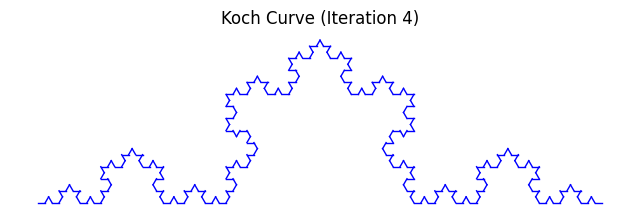

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def koch_curve(ax, p1, p2, depth):
    """Recursively draws the Koch curve between points p1 and p2."""
    if depth == 0:
        ax.plot([p1[0], p2[0]], [p1[1], p2[1]], 'b', lw=1)
    else:
        # Compute the three new points
        p1 = np.array(p1)
        p2 = np.array(p2)
        delta = (p2 - p1) / 3
        pA = p1 + delta
        pC = p1 + 2 * delta

        # Rotate by 60 degrees to find peak point B
        angle = np.pi / 3  # 60 degrees in radians
        rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
        pB = pA + np.dot(rotation_matrix, (pC - pA))

        # Recursively draw the four smaller segments
        koch_curve(ax, p1, pA, depth - 1)
        koch_curve(ax, pA, pB, depth - 1)
        koch_curve(ax, pB, pC, depth - 1)
        koch_curve(ax, pC, p2, depth - 1)

# Plot the Koch curve
fig, ax = plt.subplots(figsize=(8, 4))
koch_curve(ax, [0, 0], [1, 0], depth=4)  # Adjust depth for detail

# Formatting
ax.set_aspect('equal')
ax.axis('off')
plt.title("Koch Curve (Iteration 4)")
plt.show()


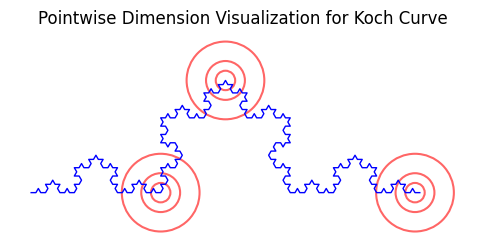

| Point                      |   Radius |   Points within Radius |
|----------------------------|----------|------------------------|
| Point 1 (x=0.333, y=0.000) |    0.1   |                     31 |
| Point 1 (x=0.333, y=0.000) |    0.05  |                     13 |
| Point 1 (x=0.333, y=0.000) |    0.025 |                      7 |
| Point 2 (x=0.500, y=0.289) |    0.1   |                     31 |
| Point 2 (x=0.500, y=0.289) |    0.05  |                     13 |
| Point 2 (x=0.500, y=0.289) |    0.025 |                      7 |
| Point 3 (x=0.988, y=0.000) |    0.1   |                     17 |
| Point 3 (x=0.988, y=0.000) |    0.05  |                      8 |
| Point 3 (x=0.988, y=0.000) |    0.025 |                      5 |


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from tabulate import tabulate

def plot_koch_with_scaling(ax, depth):
    """Plots the Koch curve and overlays scaling circles."""
    # Generate Koch curve points
    points = [[0, 0], [1, 0]]
    for _ in range(depth):
        new_points = []
        for i in range(len(points) - 1):
            p1 = np.array(points[i])
            p2 = np.array(points[i + 1])
            delta = (p2 - p1) / 3
            pA = p1 + delta
            pC = p1 + 2 * delta
            angle = np.pi / 3  # 60 degrees
            rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
            pB = pA + np.dot(rotation_matrix, (pC - pA))
            new_points.extend([p1.tolist(), pA.tolist(), pB.tolist(), pC.tolist()])
        new_points.append(points[-1])
        points = new_points

    # Convert to numpy array for easy handling
    points = np.array(points)

    # Plot the Koch curve
    ax.plot(points[:, 0], points[:, 1], 'b', lw=1)

    # Choose some key points to analyze local scaling
    chosen_points = [points[len(points) // 4], points[len(points) // 2], points[-2]]
    radii = [0.1, 0.05, 0.025]  # Different scales

    # Plot circles around the chosen points
    for p in chosen_points:
        for r in radii:
            circle = patches.Circle(p, r, color='r', fill=False, lw=1.5, alpha=0.6)
            ax.add_patch(circle)

    return points, chosen_points, radii

def count_points_within_radius(center, radius, points):
    distances = np.linalg.norm(points - center, axis=1)
    return np.sum(distances < radius)

# Plot and collect data
fig, ax = plt.subplots(figsize=(6, 6))
depth = 4
points, chosen_points, radii = plot_koch_with_scaling(ax, depth)
ax.set_aspect('equal')
ax.axis('off')
plt.title("Pointwise Dimension Visualization for Koch Curve")
plt.show()

# Prepare table data
table = []
for i, p in enumerate(chosen_points):
    for r in radii:
        count = count_points_within_radius(p, r, points)
        table.append([
            f'Point {i+1} (x={p[0]:.3f}, y={p[1]:.3f})',
            r,
            count
        ])

# Print the table
headers = ["Point", "Radius", "Points within Radius"]
print(tabulate(table, headers=headers, tablefmt="github"))


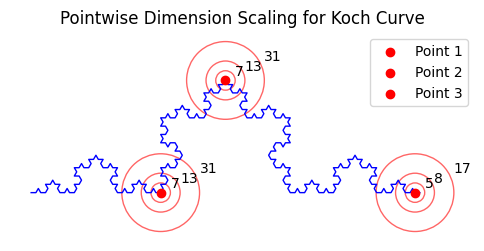

In [ ]:


# Plot the Koch curve with circles and point counts annotated

fig, ax = plt.subplots(figsize=(6, 6))

# Plot the Koch curve
ax.plot(points[:, 0], points[:, 1], 'b', lw=1)

# Plot chosen points and overlay circles with annotation
for i, (p, label) in enumerate(zip(chosen_points, scaling_data.keys())):
    ax.scatter(*p, color='red', zorder=3, label=f'Point {i+1}')
    for r in radii:
        circle = patches.Circle(p, r, color='r', fill=False, lw=1, alpha=0.6)
        ax.add_patch(circle)
        # Annotate number of points inside the circle
        count = scaling_data[label][f'Radius {r}']
        ax.text(p[0] + r, p[1] + r/2, f"{count}", fontsize=10, color='black')

# Formatting
ax.set_aspect('equal')
ax.axis('off')
plt.legend()
plt.title("Pointwise Dimension Scaling for Koch Curve")
plt.show()


## Serpeinski Trinagle
---

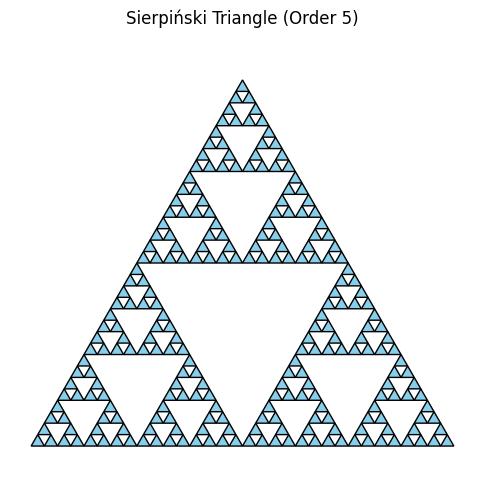

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def sierpinski_triangle(order, points):
    if order == 0:
        triangle = plt.Polygon(points, edgecolor='black', fill=True, facecolor='skyblue')
        plt.gca().add_patch(triangle)
    else:
        # Midpoints of each side
        midpoints = [
            (points[0] + points[1]) / 2,
            (points[1] + points[2]) / 2,
            (points[2] + points[0]) / 2
        ]
        # Recursive calls on the 3 outer triangles
        sierpinski_triangle(order - 1, [points[0], midpoints[0], midpoints[2]])
        sierpinski_triangle(order - 1, [midpoints[0], points[1], midpoints[1]])
        sierpinski_triangle(order - 1, [midpoints[2], midpoints[1], points[2]])

def draw_sierpinski(order=4):
    # Define the main triangle
    p1 = np.array([0, 0])
    p2 = np.array([1, 0])
    p3 = np.array([0.5, np.sqrt(3) / 2])
    plt.figure(figsize=(6, 6))
    sierpinski_triangle(order, [p1, p2, p3])
    plt.axis('equal')
    plt.axis('off')
    plt.title(f"Sierpiński Triangle (Order {order})")
    plt.show()

# Example usage
draw_sierpinski(order=5)


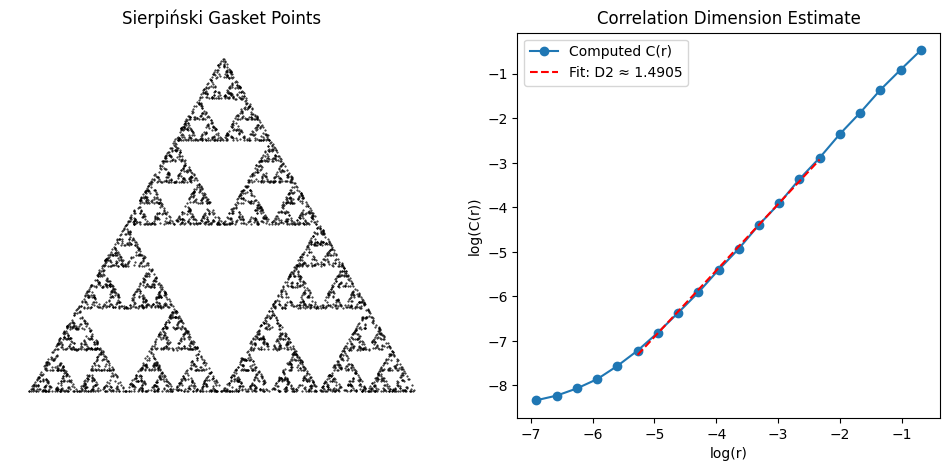

np.float64(1.4905006348008398)

In [ ]:
import scipy.spatial

def generate_sierpinski_gasket(n_points=10000):
    """Generate points for the Sierpiński gasket using an Iterated Function System (IFS)."""
    vertices = np.array([[0, 0], [1, 0], [0.5, np.sqrt(3)/2]])  # Equilateral triangle
    points = [vertices[0]]  # Start at one vertex

    for _ in range(n_points - 1):
        choice = vertices[np.random.randint(3)]  # Choose a random vertex
        new_point = (points[-1] + choice) / 2  # Midpoint rule
        points.append(new_point)

    return np.array(points)

def compute_correlation_sum(points, r_vals):
    """Compute the correlation sum C(r) for a set of distances."""
    N = len(points)
    dists = scipy.spatial.distance.pdist(points)  # Compute pairwise distances
    dists = scipy.spatial.distance.squareform(dists)  # Convert to symmetric matrix

    C_r = [np.sum(dists < r) / (N * (N - 1)) for r in r_vals]  # Normalize by N^2
    return np.array(C_r)

# Generate Sierpiński gasket points
n_points = 5000
sierpinski_points = generate_sierpinski_gasket(n_points)

# Define range of r values in log scale
r_min, r_max = 0.001, 0.5
r_values = np.logspace(np.log10(r_min), np.log10(r_max), num=20)

# Compute correlation sum C(r)
C_r_values = compute_correlation_sum(sierpinski_points, r_values)

# Fit a line to estimate the slope (correlation dimension)
log_r = np.log(r_values)
log_C_r = np.log(C_r_values)

# Linear fit (taking a subset to focus on the scaling region)
fit_range = slice(5, 15)  # Select the range where scaling holds
slope, intercept = np.polyfit(log_r[fit_range], log_C_r[fit_range], 1)

# Plot the results
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Scatter plot of Sierpiński gasket
ax[0].scatter(sierpinski_points[:, 0], sierpinski_points[:, 1], s=0.2, color='black')
ax[0].set_title("Sierpiński Gasket Points")
ax[0].axis('equal')
ax[0].axis('off')

# Log-log plot of correlation sum
ax[1].plot(log_r, log_C_r, 'o-', label="Computed C(r)")
ax[1].plot(log_r[fit_range], slope * log_r[fit_range] + intercept, 'r--', label=f"Fit: D2 ≈ {slope:.4f}")
ax[1].set_xlabel("log(r)")
ax[1].set_ylabel("log(C(r))")
ax[1].set_title("Correlation Dimension Estimate")
ax[1].legend()

plt.show()

# Return computed correlation dimension
slope


In [ ]:
pip install opencv-python pillow


Generating animation frames...


Order 6: 100%|██████████| 53/53 [00:37<00:00,  1.40it/s]


Creating GIF animation with 146 frames...


Creating GIF: 100%|██████████| 146/146 [00:00<00:00, 188.97it/s]


Cleaning up temporary files...
Animation saved to sierpinski_animation.gif


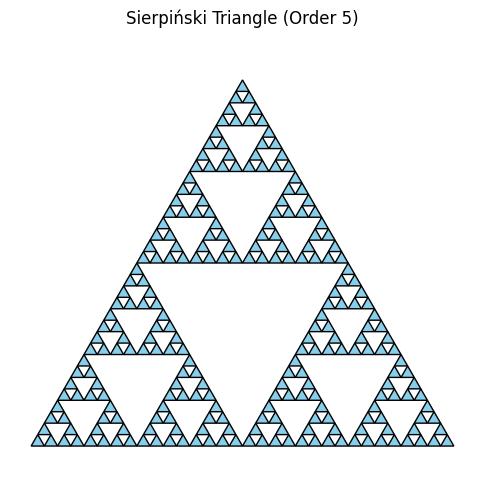

In [ ]:
import os

import imageio
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm  # For progress bar (optional, install with pip if needed)


def sierpinski_triangle(order, points):
    if order == 0:
        triangle = plt.Polygon(
            points, edgecolor="black", fill=True, facecolor="skyblue"
        )
        plt.gca().add_patch(triangle)
    else:
        # Midpoints of each side
        midpoints = [
            (points[0] + points[1]) / 2,
            (points[1] + points[2]) / 2,
            (points[2] + points[0]) / 2,
        ]
        # Recursive calls on the 3 outer triangles
        sierpinski_triangle(order - 1, [points[0], midpoints[0], midpoints[2]])
        sierpinski_triangle(order - 1, [midpoints[0], points[1], midpoints[1]])
        sierpinski_triangle(order - 1, [midpoints[2], midpoints[1], points[2]])


def draw_sierpinski_for_frame(order, save_path=None):
    # Define the main triangle
    p1 = np.array([0, 0])
    p2 = np.array([1, 0])
    p3 = np.array([0.5, np.sqrt(3) / 2])

    fig = plt.figure(figsize=(6, 6))
    sierpinski_triangle(order, [p1, p2, p3])
    plt.axis("equal")
    plt.axis("off")
    plt.title(f"Sierpiński Triangle (Order {order})")

    if save_path:
        plt.savefig(save_path, bbox_inches="tight")
        plt.close(fig)
        return save_path
    else:
        plt.show()


def create_sierpinski_animation(
    max_order=5, duration=15, output_path="sierpinski_animation.gif"
):

    # Create temp directory for frames
    temp_dir = os.path.join(os.path.dirname(output_path), "temp_frames")
    os.makedirs(temp_dir, exist_ok=True)

    frames = []

    # Calculate how many frames to generate for each order
    # More frames for higher orders to emphasize complexity
    frames_per_order = {}
    total_frames = int(duration * 10)  # 10 fps is smooth enough
    remaining_frames = total_frames

    # Assign frames in exponentially increasing number as order increases
    base_frames = 3
    order_frames = []
    for i in range(max_order + 1):
        # Assign exponentially more frames to higher orders
        order_frames.append(base_frames * (1.5**i))

    # Normalize to get our desired total
    frame_sum = sum(order_frames)
    for i in range(max_order + 1):
        frames_per_order[i] = max(3, int(order_frames[i] * total_frames / frame_sum))

    print("Generating animation frames...")
    # Generate the frames for each order
    for order in range(max_order + 1):
        num_frames = frames_per_order[order]
        for i in tqdm(range(num_frames), desc=f"Order {order}"):
            frame_path = os.path.join(
                temp_dir, f"sierpinski_order_{order}frame{i:03d}.png"
            )
            draw_sierpinski_for_frame(order, save_path=frame_path)
            frames.append(frame_path)

    print(f"Creating GIF animation with {len(frames)} frames...")
    # Create the GIF animation
    with imageio.get_writer(
        output_path, mode="I", fps=len(frames) / duration
    ) as writer:
        for frame_path in tqdm(frames, desc="Creating GIF"):
            image = imageio.v2.imread(frame_path)
            writer.append_data(image)

    # Clean up the temporary frames
    print("Cleaning up temporary files...")
    for frame_path in frames:
        os.remove(frame_path)
    os.rmdir(temp_dir)

    print(f"Animation saved to {output_path}")


def draw_sierpinski(order=4):
    # Define the main triangle
    p1 = np.array([0, 0])
    p2 = np.array([1, 0])
    p3 = np.array([0.5, np.sqrt(3) / 2])
    plt.figure(figsize=(6, 6))
    sierpinski_triangle(order, [p1, p2, p3])
    plt.axis("equal")
    plt.axis("off")
    plt.title(f"Sierpiński Triangle (Order {order})")
    plt.show()


create_sierpinski_animation(
    max_order=6, duration=15, output_path="sierpinski_animation.gif"
)



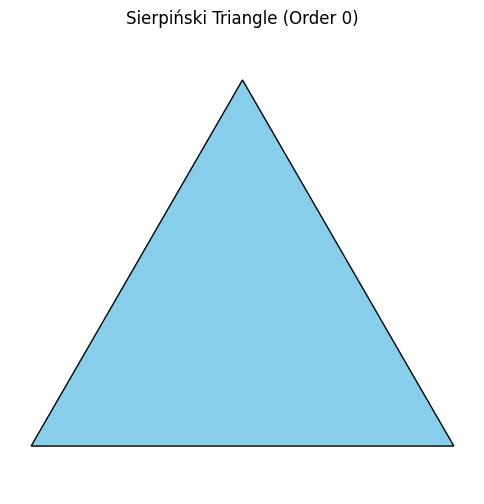

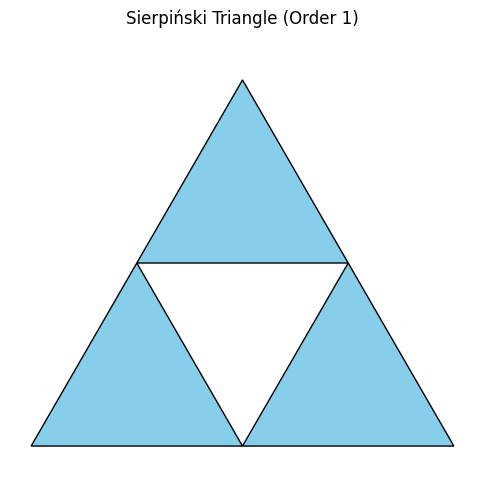

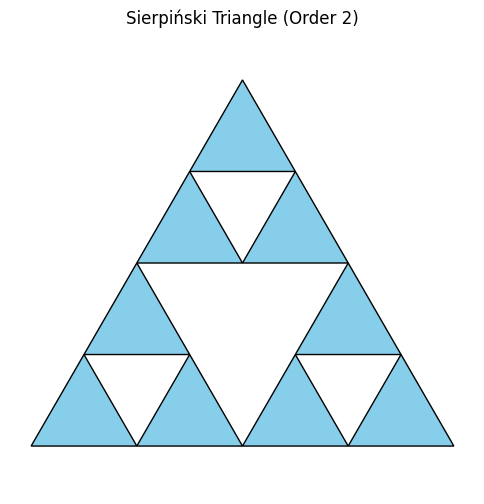

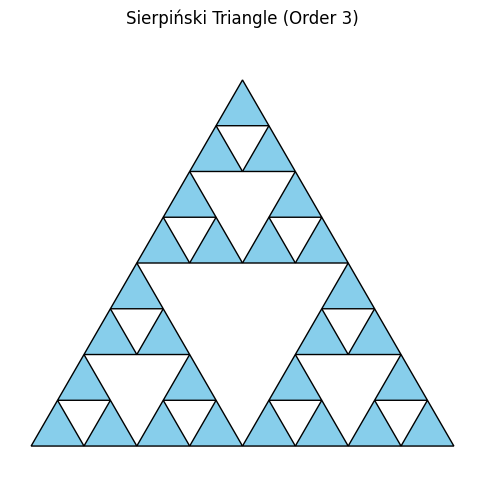

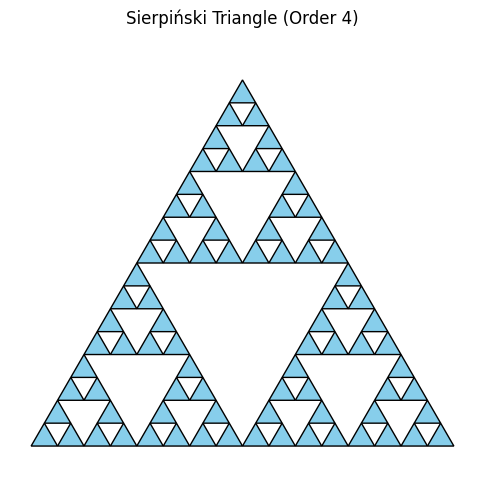

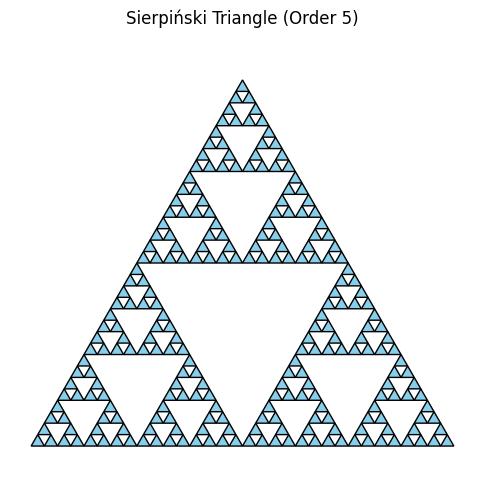

In [ ]:
# Example usage of static version - uncomment if needed
for order in range(6):
  draw_sierpinski(order)

## Logistic Map

---

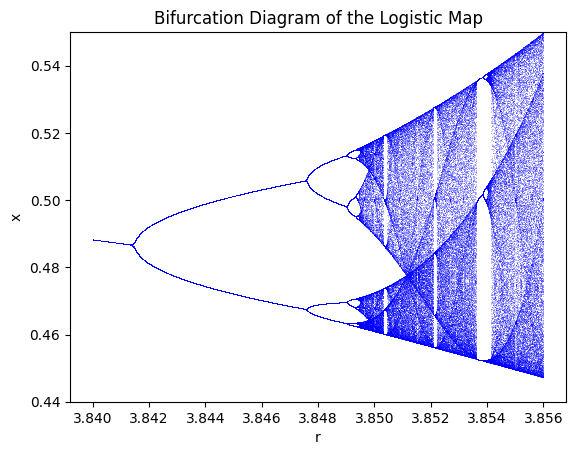

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def logistic_map(r, x):
    return r * x * (1 - x)

def plot_logistic_map(iterations=1000, last=100, r_min=3.84, r_max=3.856, points=10000):
    r_values = np.linspace(r_min, r_max, points)
    x_values = np.ones(points) * 0.5  # Initial condition

    for _ in range(iterations):
        x_values = logistic_map(r_values, x_values)
        if _ >= (iterations - last):  # Plot only the last few iterations
            plt.plot(r_values, x_values, ',b', alpha=0.25)

    plt.xlabel("r")
    plt.ylabel("x")
    plt.title("Bifurcation Diagram of the Logistic Map")
    plt.ylim(0.44, 0.55)
    plt.show()

plot_logistic_map()

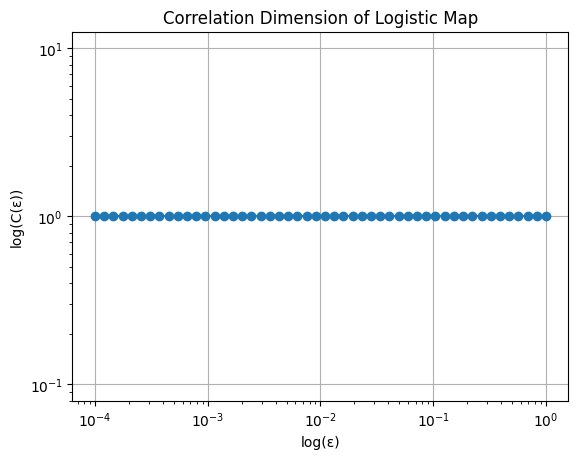

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KDTree

def logistic_map(r, x0, n):
    x = np.zeros(n)
    x[0] = x0
    for i in range(1, n):
        x[i] = r * x[i-1] * (1 - x[i-1])
    return x

def correlation_dimension(X, epsilons):
    N = len(X)
    tree = KDTree(X.reshape(-1, 1))
    C = []
    for eps in epsilons:
        count = tree.query_radius(X.reshape(-1, 1), r=eps, count_only=True)
        C.append(np.sum(count) / (N * N))
    return np.array(C)

# Parameters
r = 4.0
x0 = 0.5
N = 10000
x = logistic_map(r, x0, N)
x = x[1000:]  # Remove transients

# Compute correlation sum
epsilons = np.logspace(-4, 0, 50)
C = correlation_dimension(x, epsilons)

# Plot
plt.loglog(epsilons, C, 'o-')
plt.xlabel("log(ε)")
plt.ylabel("log(C(ε))")
plt.title("Correlation Dimension of Logistic Map")
plt.grid(True)
plt.show()


Generated 10000 points for logistic map with r = 3.57
First 10 points: 0.8108, 0.5476, 0.8844, 0.3650, 0.8274, 0.5098, 0.8922, 0.3435, 0.8050, 0.5603
Epsilon: 1.0000e-04, C(ε): 9.1491e-03
Epsilon: 1.5656e-04, C(ε): 1.2751e-02
Epsilon: 2.4511e-04, C(ε): 1.6815e-02
Epsilon: 3.8375e-04, C(ε): 2.2106e-02
Epsilon: 6.0080e-04, C(ε): 2.6943e-02
Epsilon: 9.4062e-04, C(ε): 3.4464e-02
Epsilon: 1.4726e-03, C(ε): 4.3205e-02
Epsilon: 2.3056e-03, C(ε): 5.5399e-02
Epsilon: 3.6096e-03, C(ε): 6.5950e-02
Epsilon: 5.6512e-03, C(ε): 8.2543e-02
Epsilon: 8.8476e-03, C(ε): 1.0824e-01
Epsilon: 1.3852e-02, C(ε): 1.4040e-01
Epsilon: 2.1687e-02, C(ε): 1.6050e-01
Epsilon: 3.3953e-02, C(ε): 1.9978e-01
Epsilon: 5.3157e-02, C(ε): 2.6980e-01
Epsilon: 8.3222e-02, C(ε): 3.5090e-01
Epsilon: 1.3029e-01, C(ε): 4.0238e-01
Epsilon: 2.0399e-01, C(ε): 4.7291e-01
Epsilon: 3.1937e-01, C(ε): 5.8699e-01
Epsilon: 5.0000e-01, C(ε): 8.7984e-01

Calculated correlation dimension (full range): 0.5115
Correlation dimension (middle range

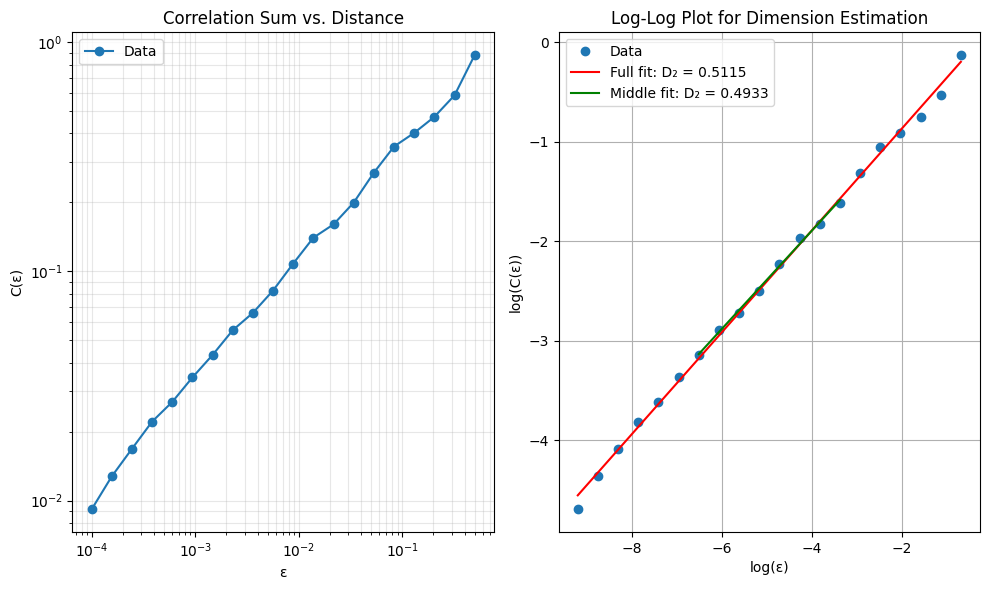


Data for log-log plot:
log(ε), log(C(ε))
-9.210340, -4.694094
-8.762067, -4.362165
-8.313794, -4.085495
-7.865520, -3.811901
-7.417247, -3.614034
-6.968974, -3.367827
-6.520700, -3.141794
-6.072427, -2.893187
-5.624154, -2.718859
-5.175880, -2.494441
-4.727607, -2.223402
-4.279334, -1.963257
-3.831060, -1.829483
-3.382787, -1.610560
-2.934514, -1.310090
-2.486240, -1.047246
-2.037967, -0.910357
-1.589694, -0.748844
-1.141421, -0.532753
-0.693147, -0.128018


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

def logistic_map(r, x0, iterations, transient=1000):
    """
    Generate points from the logistic map.

    Args:
        r: Parameter for the logistic map
        x0: Initial value between 0 and 1
        iterations: Number of iterations to compute
        transient: Number of initial iterations to discard

    Returns:
        Array of points from the logistic map
    """
    # Initialize array to store points
    points = np.zeros(iterations)

    # Initial value
    x = x0

    # Discard transient iterations
    for _ in range(transient):
        x = r * x * (1 - x)

    # Store actual iterations
    for i in range(iterations):
        x = r * x * (1 - x)
        points[i] = x

    return points

def correlation_sum(points, epsilon):
    """Calculate the correlation sum for a given epsilon.

    The correlation sum C(ε) is the fraction of pairs of points
    whose distance is less than ε.

    Args:
        points: Array of points
        epsilon: Distance threshold

    Returns:
        Normalized count of point pairs with distance < epsilon
    """
    n = len(points)
    count = 0

    # Count pairs with distance < epsilon
    for i in range(n):
        for j in range(i + 1, n):
            dist = abs(points[i] - points[j])
            if dist < epsilon:
                count += 1

    # Return normalized count
    return 2 * count / (n * (n - 1))

def calculate_correlation_dimension(points, min_epsilon=1e-4, max_epsilon=0.5, num_epsilons=20):
    """Calculate the correlation dimension using the Grassberger-Procaccia algorithm.

    Args:
        points: Array of points
        min_epsilon: Minimum distance threshold
        max_epsilon: Maximum distance threshold
        num_epsilons: Number of thresholds to use

    Returns:
        Correlation dimension, epsilon values, correlation sums
    """
    # Generate logarithmically spaced epsilon values
    epsilon_values = np.logspace(np.log10(min_epsilon), np.log10(max_epsilon), num_epsilons)
    correlation_sums = []

    # Calculate correlation sum for each epsilon
    for epsilon in epsilon_values:
        c_sum = correlation_sum(points, epsilon)
        correlation_sums.append(c_sum)
        print(f"Epsilon: {epsilon:.4e}, C(ε): {c_sum:.4e}")

    # Convert to numpy arrays
    epsilon_values = np.array(epsilon_values)
    correlation_sums = np.array(correlation_sums)

    # Calculate logarithms for linear regression
    log_epsilon = np.log(epsilon_values)
    log_c = np.log(correlation_sums)

    # Linear regression on log-log data
    slope, intercept, r_value, p_value, std_err = stats.linregress(log_epsilon, log_c)

    # Calculate for middle range to avoid boundary effects
    mid_start = int(num_epsilons * 0.3)
    mid_end = int(num_epsilons * 0.7)

    mid_slope, mid_intercept, mid_r_value, mid_p_value, mid_std_err = stats.linregress(
        log_epsilon[mid_start:mid_end], log_c[mid_start:mid_end]
    )

    return slope, mid_slope, epsilon_values, correlation_sums

def main():
    # Parameters
    r = 3.57  # Parameter for chaotic behavior
    x0 = 0.4  # Initial value between 0 and 1
    iterations = 10000  # Number of points to generate
    sample_size = 1000  # Use a subset for computational efficiency

    # Generate logistic map data
    points = logistic_map(r, x0, iterations)
    print(f"Generated {iterations} points for logistic map with r = {r}")
    print(f"First 10 points: {', '.join([f'{x:.4f}' for x in points[:10]])}")

    # Use sample for correlation dimension calculation
    sampled_points = points[:sample_size]

    # Calculate correlation dimension
    dimension, mid_dimension, epsilons, c_sums = calculate_correlation_dimension(sampled_points)

    print(f"\nCalculated correlation dimension (full range): {dimension:.4f}")
    print(f"Correlation dimension (middle range): {mid_dimension:.4f}")

    # Plot results
    plt.figure(figsize=(10, 6))

    # Log-log plot of C(ε) vs ε
    plt.subplot(1, 2, 1)
    plt.loglog(epsilons, c_sums, 'o-', label='Data')
    plt.xlabel('ε')
    plt.ylabel('C(ε)')
    plt.title('Correlation Sum vs. Distance')
    plt.grid(True, which="both", ls="-", alpha=0.3)
    plt.legend()

    # Linear plot of log(C(ε)) vs. log(ε)
    plt.subplot(1, 2, 2)
    log_epsilon = np.log(epsilons)
    log_c = np.log(c_sums)

    plt.plot(log_epsilon, log_c, 'o', label='Data')

    # Plot regression lines
    x = np.array([min(log_epsilon), max(log_epsilon)])
    y_full = dimension * x + np.mean(log_c - dimension * log_epsilon)
    plt.plot(x, y_full, 'r-',
             label=f'Full fit: D₂ = {dimension:.4f}')

    # Middle range fit
    mid_start = int(len(log_epsilon) * 0.3)
    mid_end = int(len(log_epsilon) * 0.7)

    x_mid = np.array([log_epsilon[mid_start], log_epsilon[mid_end-1]])
    y_mid = mid_dimension * x_mid + np.mean(log_c[mid_start:mid_end] - mid_dimension * log_epsilon[mid_start:mid_end])
    plt.plot(x_mid, y_mid, 'g-',
             label=f'Middle fit: D₂ = {mid_dimension:.4f}')

    plt.xlabel('log(ε)')
    plt.ylabel('log(C(ε))')
    plt.title('Log-Log Plot for Dimension Estimation')
    plt.grid(True)
    plt.legend()

    plt.tight_layout()
    plt.savefig('correlation_dimension.png')
    plt.show()

    # Print data for plot
    print("\nData for log-log plot:")
    print("log(ε), log(C(ε))")
    for i in range(len(log_epsilon)):
        print(f"{log_epsilon[i]:.6f}, {log_c[i]:.6f}")

if __name__ == "__main__":
    main()

## Lorenz Attractor
  ---

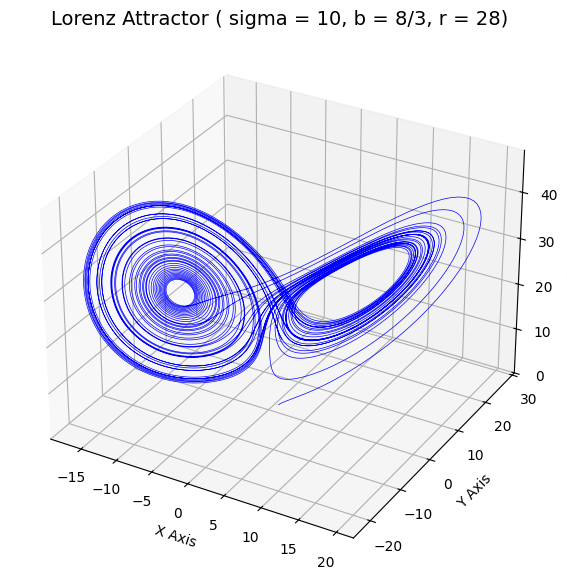

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Define the Lorenz system
def lorenz(t, state, sigma, beta, rho):
    x, y, z = state
    dxdt = sigma * (y - x)
    dydt = x * (r - z) - y
    dzdt = x * y - b * z
    return [dxdt, dydt, dzdt]

# Parameters for the Lorenz system
sigma = 10
b = 8/3
r = 28



# Initial conditions
initial_state = [1.0, 1.0, 1.0]

# Time span
t_span = (0, 50)  # Simulate for 50 seconds
t_eval = np.linspace(t_span[0], t_span[1], 10000)  # Generate 10,000 time points

# Solve the system
solution = solve_ivp(lorenz, t_span, initial_state, args=(sigma, b, r), t_eval=t_eval)

# Extract solutions
x, y, z = solution.y

# Plot the Lorenz attractor
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z, color='blue', lw=0.5)

# Labels and title
ax.set_title("Lorenz Attractor ( sigma = 10, b = 8/3, r = 28)", fontsize=14)
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")

# Show the plot
plt.show()


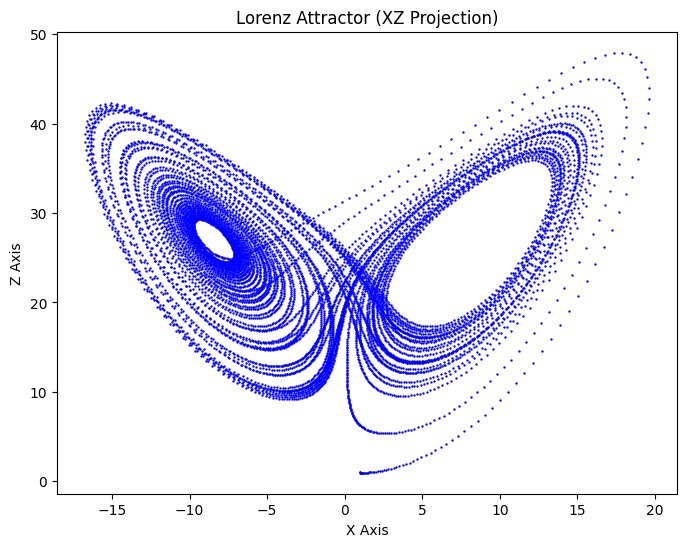

In [ ]:
import matplotlib.pyplot as plt
# Plotting the Lorenz attractor in a 2D plane (projection)

# Project the 3D data onto the XY plane
plt.figure(figsize=(8, 6))
plt.scatter(x, z, s=0.5, color='blue')  # Using scatter for better visibility
plt.title("Lorenz Attractor (XZ Projection)")
plt.xlabel("X Axis")
plt.ylabel("Z Axis")
plt.show()


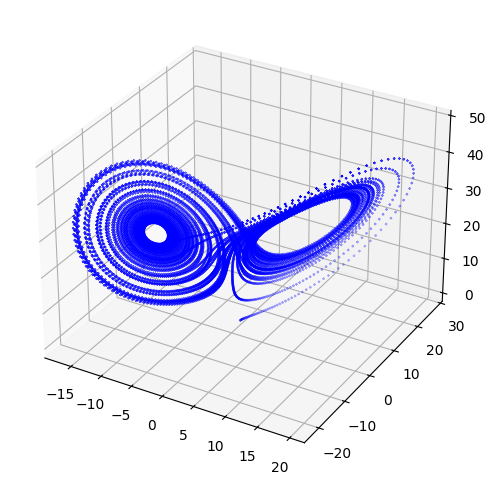

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(x, y, z, color='blue', marker='x',s=1)

Generating Lorenz attractor...
Generated 10000 points on the Lorenz attractor
Using 500 points for correlation dimension calculation

Calculating correlation dimension...
Epsilon: 1.0000e-01, C(ε): 0.0000e+00
Epsilon: 1.4600e-01, C(ε): 0.0000e+00
Epsilon: 2.1317e-01, C(ε): 0.0000e+00
Epsilon: 3.1123e-01, C(ε): 3.2064e-05
Epsilon: 4.5440e-01, C(ε): 1.6834e-04
Epsilon: 6.6343e-01, C(ε): 5.8517e-04
Epsilon: 9.6863e-01, C(ε): 1.5551e-03
Epsilon: 1.4142e+00, C(ε): 3.7675e-03
Epsilon: 2.0648e+00, C(ε): 8.7776e-03
Epsilon: 3.0146e+00, C(ε): 2.0441e-02
Epsilon: 4.4014e+00, C(ε): 4.4008e-02
Epsilon: 6.4262e+00, C(ε): 9.4541e-02
Epsilon: 9.3823e+00, C(ε): 1.8946e-01
Epsilon: 1.3698e+01, C(ε): 3.5172e-01
Epsilon: 2.0000e+01, C(ε): 5.9649e-01

Calculated correlation dimension (full range): nan
Correlation dimension (middle range): 2.4918


<ipython-input-5-53849ccafaba>:120: RuntimeWarning: divide by zero encountered in log
  log_c = np.log(correlation_sums)
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2767: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
<ipython-input-5-53849ccafaba>:177: RuntimeWarning: divide by zero encountered in log
  log_c = np.log(c_sums)


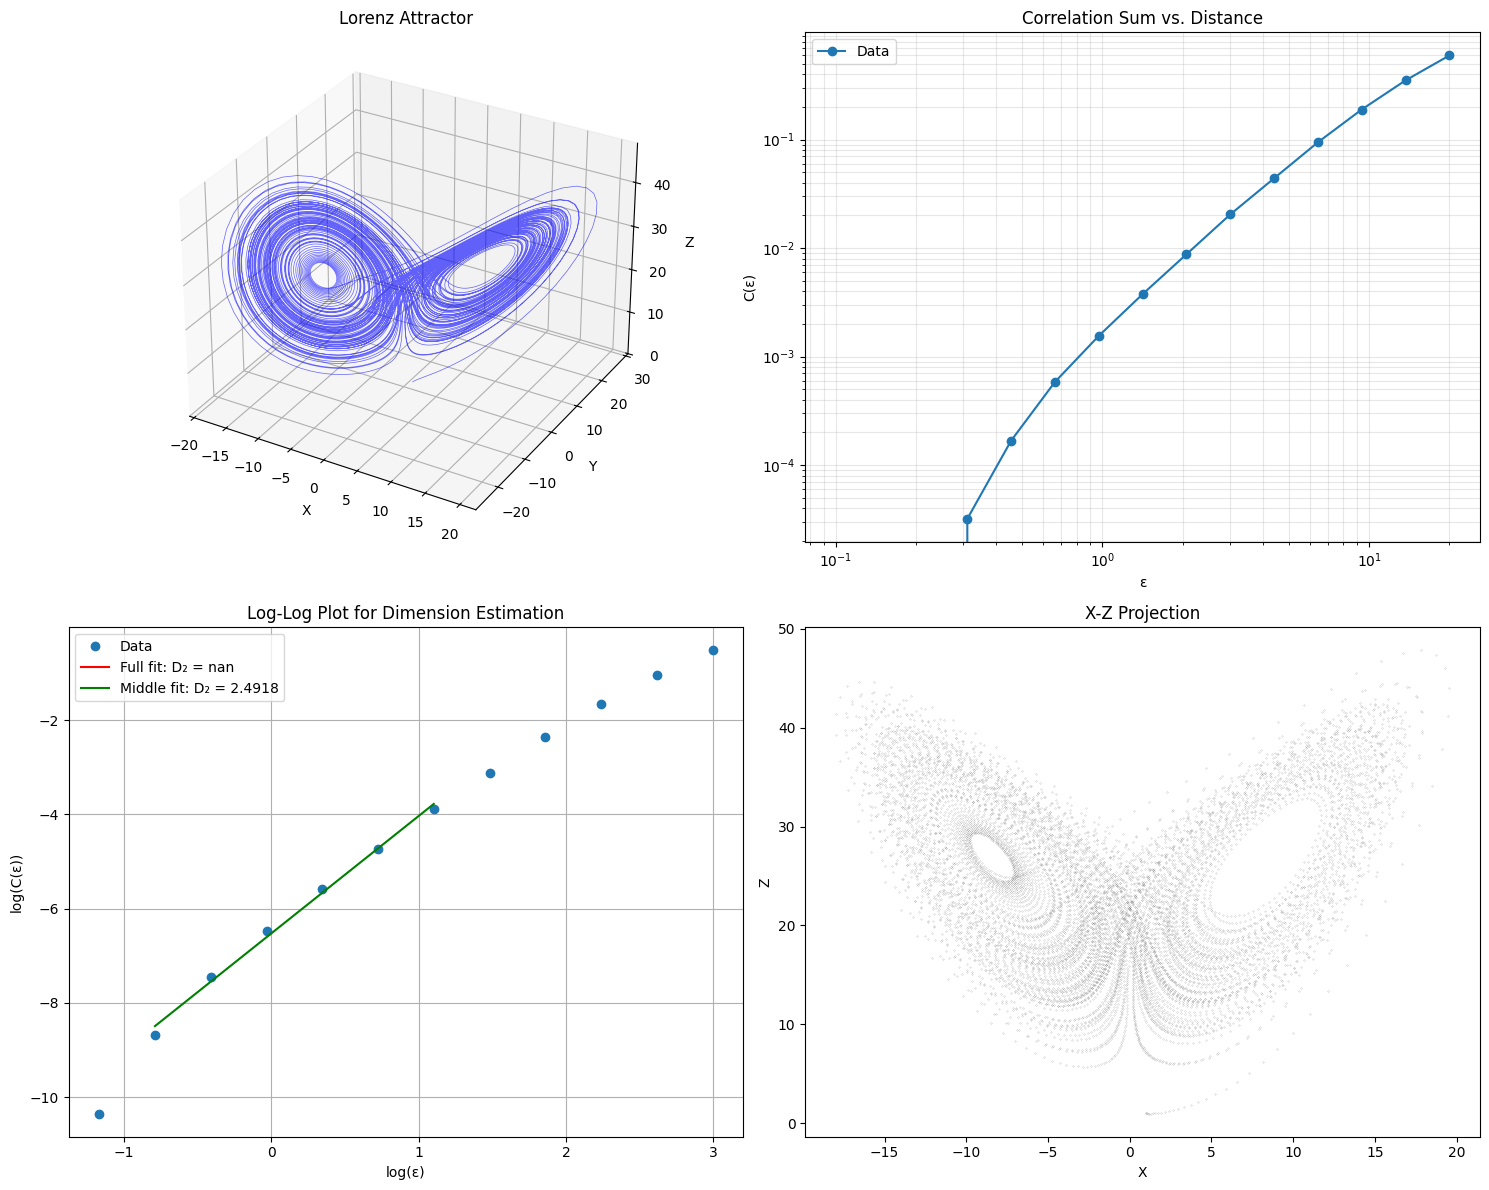


Data for log-log plot:
log(ε), log(C(ε))
-2.302585, -inf
-1.924134, -inf
-1.545683, -inf
-1.167231, -10.347773
-0.788780, -8.689545
-0.410329, -7.443608
-0.031878, -6.466209
0.346574, -5.581334
0.725025, -4.735557
1.103476, -3.890218
1.481927, -3.123383
1.860379, -2.358721
2.238830, -1.663583
2.617281, -1.044921
2.995732, -0.516695


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.integrate import solve_ivp
from mpl_toolkits.mplot3d import Axes3D

def lorenz_system(t, xyz, sigma=10, rho=28, beta=8/3):
    """Lorenz system differential equations.

    Args:
        t: Time parameter (not used, but required by solve_ivp)
        xyz: Array containing current [x, y, z] values
        sigma, rho, beta: Lorenz system parameters

    Returns:
        Derivatives [dx/dt, dy/dt, dz/dt]
    """
    x, y, z = xyz
    dxdt = sigma * (y - x)
    dydt = x * (rho - z) - y
    dzdt = x * y - beta * z
    return [dxdt, dydt, dzdt]

def generate_lorenz_attractor(initial_state=[1.0, 1.0, 1.0], t_span=(0, 100),
                              num_points=10000, sigma=10, rho=28, beta=8/3):
    """Generate points on the Lorenz attractor.

    Args:
        initial_state: Initial values [x0, y0, z0]
        t_span: Time span for integration (start, end)
        num_points: Number of points to generate
        sigma, rho, beta: Lorenz system parameters

    Returns:
        Array of shape (num_points, 3) containing points on the attractor
    """
    # Create time points for integration
    t = np.linspace(t_span[0], t_span[1], num_points)

    # Solve the system
    sol = solve_ivp(
        lambda t, xyz: lorenz_system(t, xyz, sigma, rho, beta),
        t_span,
        initial_state,
        t_eval=t,
        method='RK45',
        rtol=1e-6
    )

    # Extract solution points
    points = np.vstack([sol.y[0], sol.y[1], sol.y[2]]).T

    return points

def euclidean_distance(point1, point2):
    """Calculate Euclidean distance between two points.

    Args:
        point1, point2: Points in any dimension

    Returns:
        Euclidean distance between points
    """
    return np.sqrt(np.sum((point1 - point2)**2))

def correlation_sum(points, epsilon):
    """Calculate the correlation sum for a given epsilon.

    The correlation sum C(ε) is the fraction of pairs of points
    whose distance is less than ε.

    Args:
        points: Array of shape (n_points, n_dimensions)
        epsilon: Distance threshold

    Returns:
        Normalized count of point pairs with distance < epsilon
    """
    n = len(points)
    count = 0

    # Count pairs with distance < epsilon
    for i in range(n):
        for j in range(i + 1, n):
            dist = euclidean_distance(points[i], points[j])
            if dist < epsilon:
                count += 1

    # Return normalized count
    return 2 * count / (n * (n - 1))

def calculate_correlation_dimension(points, min_epsilon=0.1, max_epsilon=20.0, num_epsilons=15):
    """Calculate the correlation dimension using the Grassberger-Procaccia algorithm.

    Args:
        points: Array of shape (n_points, n_dimensions)
        min_epsilon: Minimum distance threshold
        max_epsilon: Maximum distance threshold
        num_epsilons: Number of thresholds to use

    Returns:
        Correlation dimension, epsilon values, correlation sums
    """
    # Generate logarithmically spaced epsilon values
    epsilon_values = np.logspace(np.log10(min_epsilon), np.log10(max_epsilon), num_epsilons)
    correlation_sums = []

    # Calculate correlation sum for each epsilon
    for epsilon in epsilon_values:
        c_sum = correlation_sum(points, epsilon)
        correlation_sums.append(c_sum)
        print(f"Epsilon: {epsilon:.4e}, C(ε): {c_sum:.4e}")

    # Convert to numpy arrays
    epsilon_values = np.array(epsilon_values)
    correlation_sums = np.array(correlation_sums)

    # Calculate logarithms for linear regression
    log_epsilon = np.log(epsilon_values)
    log_c = np.log(correlation_sums)

    # Linear regression on log-log data
    slope, intercept, r_value, p_value, std_err = stats.linregress(log_epsilon, log_c)

    # Calculate for middle range to avoid boundary effects
    mid_start = int(num_epsilons * 0.3)
    mid_end = int(num_epsilons * 0.7)

    mid_slope, mid_intercept, mid_r_value, mid_p_value, mid_std_err = stats.linregress(
        log_epsilon[mid_start:mid_end], log_c[mid_start:mid_end]
    )

    return slope, mid_slope, epsilon_values, correlation_sums

def main():
    # Generate Lorenz attractor
    print("Generating Lorenz attractor...")
    lorenz_points = generate_lorenz_attractor(num_points=10000)
    print(f"Generated {len(lorenz_points)} points on the Lorenz attractor")

    # Sample points for correlation dimension calculation (for computational efficiency)
    sample_size = 500  # Using a smaller sample because 3D distance calculations are more intensive
    sampled_points = lorenz_points[::int(len(lorenz_points)/sample_size)]
    print(f"Using {len(sampled_points)} points for correlation dimension calculation")

    # Calculate correlation dimension
    print("\nCalculating correlation dimension...")
    dimension, mid_dimension, epsilons, c_sums = calculate_correlation_dimension(sampled_points)

    print(f"\nCalculated correlation dimension (full range): {dimension:.4f}")
    print(f"Correlation dimension (middle range): {mid_dimension:.4f}")

    # Create 3D plot of Lorenz attractor
    fig = plt.figure(figsize=(15, 12))

    # 3D plot of the attractor
    ax1 = fig.add_subplot(2, 2, 1, projection='3d')
    ax1.plot(lorenz_points[:, 0], lorenz_points[:, 1], lorenz_points[:, 2],
             'b-', linewidth=0.5, alpha=0.6)
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_zlabel('Z')
    ax1.set_title('Lorenz Attractor')

    # Log-log plot of C(ε) vs ε
    ax2 = fig.add_subplot(2, 2, 2)
    ax2.loglog(epsilons, c_sums, 'o-', label='Data')
    ax2.set_xlabel('ε')
    ax2.set_ylabel('C(ε)')
    ax2.set_title('Correlation Sum vs. Distance')
    ax2.grid(True, which="both", ls="-", alpha=0.3)
    ax2.legend()

    # Linear plot of log(C(ε)) vs. log(ε)
    ax3 = fig.add_subplot(2, 2, 3)
    log_epsilon = np.log(epsilons)
    log_c = np.log(c_sums)

    ax3.plot(log_epsilon, log_c, 'o', label='Data')

    # Plot regression lines
    x = np.array([min(log_epsilon), max(log_epsilon)])
    y_full = dimension * x + np.mean(log_c - dimension * log_epsilon)
    ax3.plot(x, y_full, 'r-',
             label=f'Full fit: D₂ = {dimension:.4f}')

    # Middle range fit
    mid_start = int(len(log_epsilon) * 0.3)
    mid_end = int(len(log_epsilon) * 0.7)

    x_mid = np.array([log_epsilon[mid_start], log_epsilon[mid_end-1]])
    y_mid = mid_dimension * x_mid + np.mean(log_c[mid_start:mid_end] - mid_dimension * log_epsilon[mid_start:mid_end])
    ax3.plot(x_mid, y_mid, 'g-',
             label=f'Middle fit: D₂ = {mid_dimension:.4f}')

    ax3.set_xlabel('log(ε)')
    ax3.set_ylabel('log(C(ε))')
    ax3.set_title('Log-Log Plot for Dimension Estimation')
    ax3.grid(True)
    ax3.legend()

    # Add projections of the attractor
    ax4 = fig.add_subplot(2, 2, 4)
    ax4.plot(lorenz_points[:, 0], lorenz_points[:, 2], 'k.', markersize=0.3, alpha=0.5)
    ax4.set_xlabel('X')
    ax4.set_ylabel('Z')
    ax4.set_title('X-Z Projection')

    plt.tight_layout()
    plt.savefig('lorenz_correlation_dimension.png')
    plt.show()

    # Print data for plot
    print("\nData for log-log plot:")
    print("log(ε), log(C(ε))")
    for i in range(len(log_epsilon)):
        print(f"{log_epsilon[i]:.6f}, {log_c[i]:.6f}")

if __name__ == "__main__":
    main()

Starting Lorenz attractor correlation dimension analysis...
Discarding transient iterations...
Generating 10000 points on the Lorenz attractor...
Generated 10000 points on the Lorenz attractor
First point: (-4.7988, -3.8771, 24.2244)
Last point: (-10.3320, -18.5806, 15.1140)
Using 500 points for correlation dimension calculation
Finding suitable epsilon range...
Distance range in sample: 2.0120 - 44.2480
10th percentile distance: 5.2611
90th percentile distance: 32.5475

Calculating correlation sums for different epsilons...
Processing epsilon 1/15: 1.0060e+00 -> C(ε): 2.3006e-03 (took 0.90s)
Processing epsilon 2/15: 1.2973e+00 -> C(ε): 3.7836e-03 (took 0.87s)
Processing epsilon 3/15: 1.6730e+00 -> C(ε): 6.4609e-03 (took 0.91s)
Processing epsilon 4/15: 2.1576e+00 -> C(ε): 1.0557e-02 (took 0.90s)
Processing epsilon 5/15: 2.7824e+00 -> C(ε): 1.8052e-02 (took 0.90s)
Processing epsilon 6/15: 3.5882e+00 -> C(ε): 3.0838e-02 (took 0.90s)
Processing epsilon 7/15: 4.6273e+00 -> C(ε): 5.1816e-02

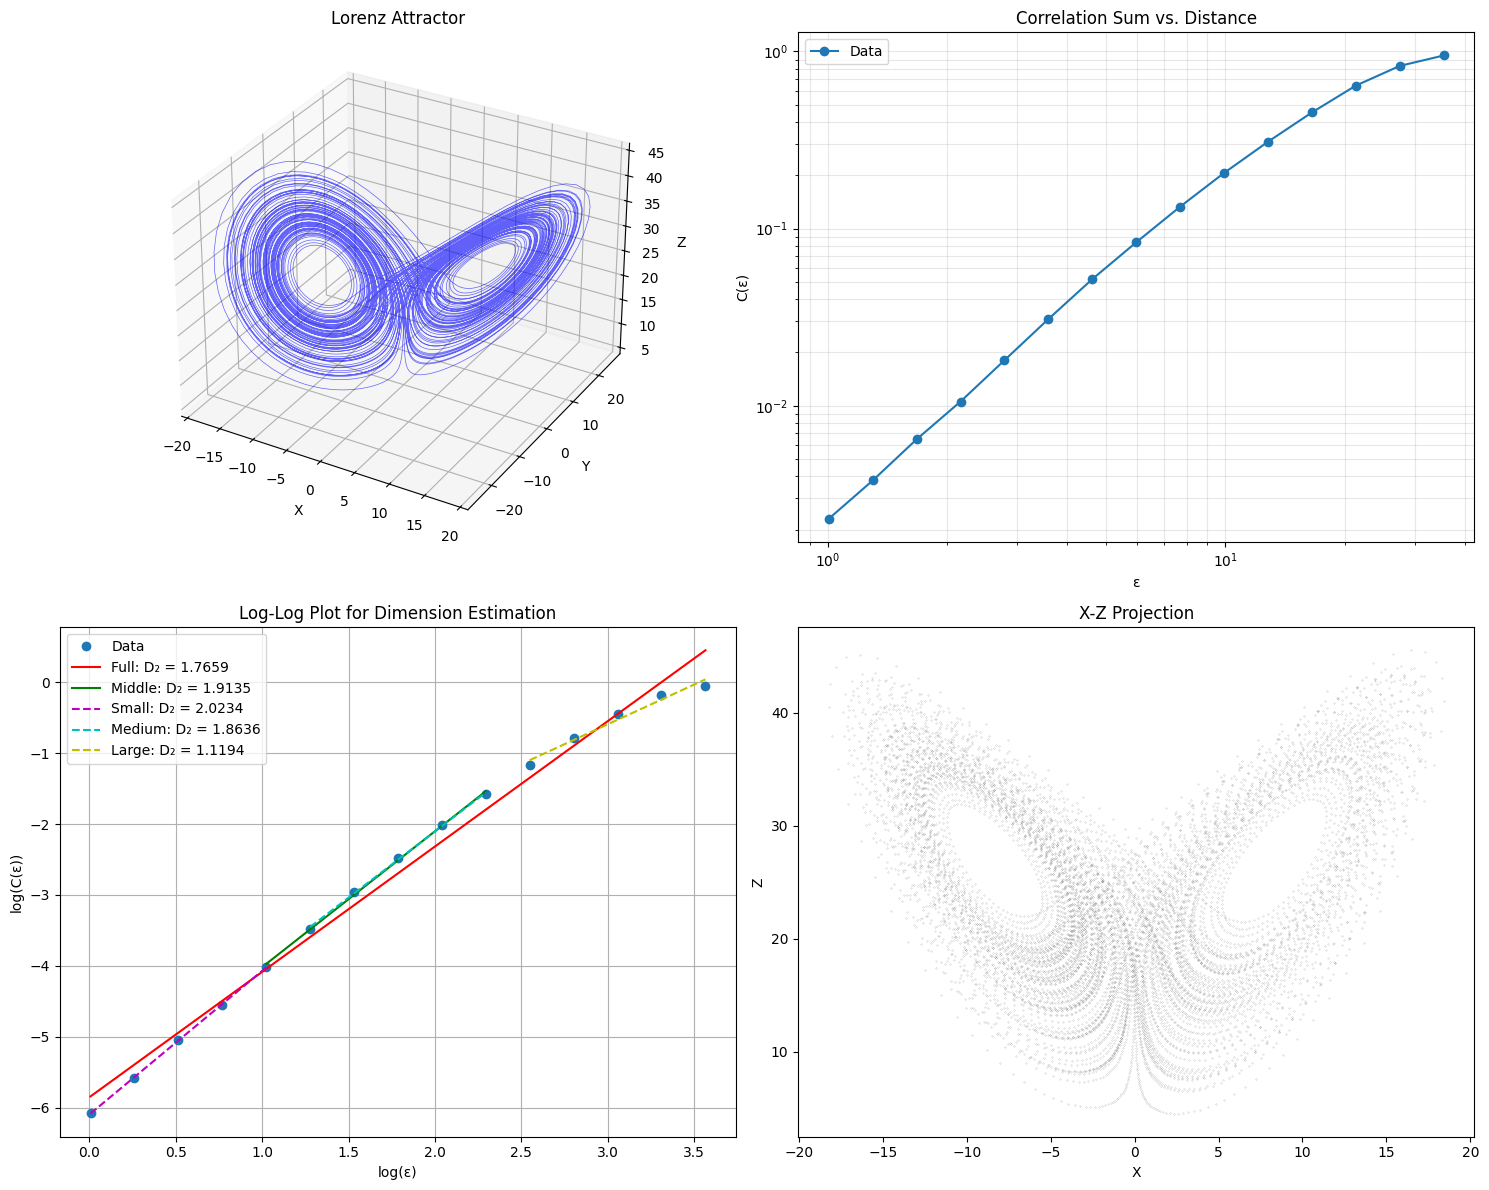


Data for log-log plot:
log(ε), log(C(ε))
0.005967, -6.074585
0.260303, -5.577088
0.514638, -5.041983
0.768974, -4.550955
1.023310, -4.014493
1.277645, -3.479018
1.531981, -2.960063
1.786316, -2.481434
2.040652, -2.018175
2.294988, -1.580015
2.549323, -1.174226
2.803659, -0.793594
3.057995, -0.444798
3.312330, -0.188539
3.566666, -0.053257

Analysis complete!


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from mpl_toolkits.mplot3d import Axes3D
import time

def lorenz_system(xyz, sigma=10, rho=28, beta=8/3):
    """Calculate derivatives for the Lorenz system.

    Args:
        xyz: Array containing current [x, y, z] values
        sigma, rho, beta: Lorenz system parameters

    Returns:
        Derivatives [dx/dt, dy/dt, dz/dt]
    """
    x, y, z = xyz
    dx_dt = sigma * (y - x)
    dy_dt = x * (rho - z) - y
    dz_dt = x * y - beta * z
    return np.array([dx_dt, dy_dt, dz_dt])

def rk4_step(f, xyz, dt):
    """Perform one step of 4th order Runge-Kutta integration.

    Args:
        f: Function that returns derivatives
        xyz: Current state variables
        dt: Time step

    Returns:
        New state after one integration step
    """
    k1 = f(xyz)
    k2 = f(xyz + dt * k1 / 2)
    k3 = f(xyz + dt * k2 / 2)
    k4 = f(xyz + dt * k3)

    return xyz + (dt / 6) * (k1 + 2*k2 + 2*k3 + k4)

def generate_lorenz_attractor(initial_state=[1.0, 1.0, 1.0], dt=0.01,
                             iterations=10000, transient=1000,
                             sigma=10, rho=28, beta=8/3):
    """Generate points on the Lorenz attractor.

    Args:
        initial_state: Initial values [x0, y0, z0]
        dt: Time step for integration
        iterations: Number of points to generate
        transient: Number of initial points to discard
        sigma, rho, beta: Lorenz system parameters

    Returns:
        Array of shape (iterations, 3) containing points on the attractor
    """
    # Define the derivative function with the given parameters
    f = lambda xyz: lorenz_system(xyz, sigma, rho, beta)

    # Initial state
    xyz = np.array(initial_state)

    # Discard transient behavior
    print("Discarding transient iterations...")
    for _ in range(transient):
        xyz = rk4_step(f, xyz, dt)

    # Store points on the attractor
    print(f"Generating {iterations} points on the Lorenz attractor...")
    points = np.zeros((iterations, 3))
    for i in range(iterations):
        xyz = rk4_step(f, xyz, dt)
        points[i] = xyz

    return points

def euclidean_distance(point1, point2):
    """Calculate Euclidean distance between two points.

    Args:
        point1, point2: Points in any dimension

    Returns:
        Euclidean distance between points
    """
    return np.sqrt(np.sum((point1 - point2)**2))

def correlation_sum(points, epsilon):
    """Calculate the correlation sum for a given epsilon.

    The correlation sum C(ε) is the fraction of pairs of points
    whose distance is less than ε.

    Args:
        points: Array of shape (n_points, n_dimensions)
        epsilon: Distance threshold

    Returns:
        Normalized count of point pairs with distance < epsilon
    """
    n = len(points)
    count = 0

    # Count pairs with distance < epsilon
    for i in range(n):
        for j in range(i + 1, n):
            dist = euclidean_distance(points[i], points[j])
            if dist < epsilon:
                count += 1

    # Return normalized count
    return 2 * count / (n * (n - 1))

def find_suitable_epsilon_range(points, num_samples=100):
    """Find a suitable range of epsilon values based on the data.

    Args:
        points: Array of shape (n_points, n_dimensions)
        num_samples: Number of random pairs to sample

    Returns:
        Tuple of (min_epsilon, max_epsilon) values
    """
    print("Finding suitable epsilon range...")
    # Sample random pairs and calculate their distances
    n = len(points)
    distances = []
    for _ in range(num_samples):
        i = np.random.randint(0, n)
        j = np.random.randint(0, n)
        if i != j:
            distances.append(euclidean_distance(points[i], points[j]))

    distances.sort()
    min_distance = distances[0]
    max_distance = distances[-1]
    p10_distance = distances[int(0.1 * len(distances))]
    p90_distance = distances[int(0.9 * len(distances))]

    print(f"Distance range in sample: {min_distance:.4f} - {max_distance:.4f}")
    print(f"10th percentile distance: {p10_distance:.4f}")
    print(f"90th percentile distance: {p90_distance:.4f}")

    # Set range from half the minimum to 80% of maximum
    min_epsilon = min_distance / 2
    max_epsilon = max_distance * 0.8

    return min_epsilon, max_epsilon

def calculate_correlation_dimension(points, min_epsilon=None, max_epsilon=None, num_epsilons=15):
    """Calculate the correlation dimension using the Grassberger-Procaccia algorithm.

    Args:
        points: Array of shape (n_points, n_dimensions)
        min_epsilon: Minimum distance threshold (if None, will be determined from data)
        max_epsilon: Maximum distance threshold (if None, will be determined from data)
        num_epsilons: Number of thresholds to use

    Returns:
        Dictionary containing dimension estimates and data
    """
    start_time = time.time()

    # If not provided, find suitable epsilon range from the data
    if min_epsilon is None or max_epsilon is None:
        min_epsilon, max_epsilon = find_suitable_epsilon_range(points)

    # Generate logarithmically spaced epsilon values
    epsilon_values = np.logspace(np.log10(min_epsilon), np.log10(max_epsilon), num_epsilons)
    correlation_sums = []

    print("\nCalculating correlation sums for different epsilons...")
    # Calculate correlation sum for each epsilon
    for i, epsilon in enumerate(epsilon_values):
        print(f"Processing epsilon {i+1}/{num_epsilons}: {epsilon:.4e}", end="")
        start = time.time()
        c_sum = correlation_sum(points, epsilon)
        correlation_sums.append(c_sum)
        print(f" -> C(ε): {c_sum:.4e} (took {time.time() - start:.2f}s)")

    # Convert to numpy arrays
    epsilon_values = np.array(epsilon_values)
    correlation_sums = np.array(correlation_sums)

    # Calculate logarithms for linear regression
    log_epsilon = np.log(epsilon_values)
    log_c = np.log(correlation_sums)

    print("\nCalculating correlation dimensions...")
    # Calculate full range dimension
    full_regression = stats.linregress(log_epsilon, log_c)
    full_dimension = full_regression.slope

    # Calculate for middle range to avoid boundary effects
    mid_start = int(num_epsilons * 0.3)
    mid_end = int(num_epsilons * 0.7)

    mid_regression = stats.linregress(log_epsilon[mid_start:mid_end], log_c[mid_start:mid_end])
    mid_dimension = mid_regression.slope

    # Calculate for three different scale ranges
    first_third = int(num_epsilons / 3)
    second_third = int(2 * num_epsilons / 3)

    small_regression = stats.linregress(log_epsilon[:first_third], log_c[:first_third])
    medium_regression = stats.linregress(log_epsilon[first_third:second_third], log_c[first_third:second_third])
    large_regression = stats.linregress(log_epsilon[second_third:], log_c[second_third:])

    small_dimension = small_regression.slope
    medium_dimension = medium_regression.slope
    large_dimension = large_regression.slope

    # Print results
    print(f"\nCorrelation dimension (full range): {full_dimension:.4f}")
    print(f"Correlation dimension (middle range): {mid_dimension:.4f}")
    print(f"Dimension (small scales): {small_dimension:.4f}")
    print(f"Dimension (medium scales): {medium_dimension:.4f}")
    print(f"Dimension (large scales): {large_dimension:.4f}")

    print(f"\nTotal calculation time: {time.time() - start_time:.2f} seconds")

    # Return all results
    return {
        'full_dimension': full_dimension,
        'mid_dimension': mid_dimension,
        'small_dimension': small_dimension,
        'medium_dimension': medium_dimension,
        'large_dimension': large_dimension,
        'epsilon_values': epsilon_values,
        'correlation_sums': correlation_sums,
        'log_epsilon': log_epsilon,
        'log_c': log_c,
        'full_regression': full_regression,
        'mid_regression': mid_regression,
        'small_regression': small_regression,
        'medium_regression': medium_regression,
        'large_regression': large_regression
    }

def plot_results(lorenz_points, dimensions_data):
    """Create plots of the Lorenz attractor and correlation dimension analysis.

    Args:
        lorenz_points: Array of points on the Lorenz attractor
        dimensions_data: Dictionary with dimension calculation results
    """
    print("Creating plots...")
    fig = plt.figure(figsize=(15, 12))

    # Extract data
    epsilon_values = dimensions_data['epsilon_values']
    correlation_sums = dimensions_data['correlation_sums']
    log_epsilon = dimensions_data['log_epsilon']
    log_c = dimensions_data['log_c']
    full_dimension = dimensions_data['full_dimension']
    mid_dimension = dimensions_data['mid_dimension']
    small_dimension = dimensions_data['small_dimension']
    medium_dimension = dimensions_data['medium_dimension']
    large_dimension = dimensions_data['large_dimension']

    # 3D plot of the attractor
    ax1 = fig.add_subplot(2, 2, 1, projection='3d')
    ax1.plot(lorenz_points[:, 0], lorenz_points[:, 1], lorenz_points[:, 2],
             'b-', linewidth=0.5, alpha=0.6)
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_zlabel('Z')
    ax1.set_title('Lorenz Attractor')

    # Log-log plot of C(ε) vs ε
    ax2 = fig.add_subplot(2, 2, 2)
    ax2.loglog(epsilon_values, correlation_sums, 'o-', label='Data')
    ax2.set_xlabel('ε')
    ax2.set_ylabel('C(ε)')
    ax2.set_title('Correlation Sum vs. Distance')
    ax2.grid(True, which="both", ls="-", alpha=0.3)
    ax2.legend()

    # Linear plot of log(C(ε)) vs. log(ε) with regression lines
    ax3 = fig.add_subplot(2, 2, 3)
    ax3.plot(log_epsilon, log_c, 'o', label='Data')

    # Plot full range regression line
    x_full = np.array([min(log_epsilon), max(log_epsilon)])
    intercept_full = np.mean(log_c) - full_dimension * np.mean(log_epsilon)
    y_full = full_dimension * x_full + intercept_full
    ax3.plot(x_full, y_full, 'r-',
             label=f'Full: D₂ = {full_dimension:.4f}')

    # Plot middle range regression line
    mid_start = int(len(log_epsilon) * 0.3)
    mid_end = int(len(log_epsilon) * 0.7)
    x_mid = np.array([log_epsilon[mid_start], log_epsilon[mid_end-1]])
    intercept_mid = np.mean(log_c[mid_start:mid_end]) - mid_dimension * np.mean(log_epsilon[mid_start:mid_end])
    y_mid = mid_dimension * x_mid + intercept_mid
    ax3.plot(x_mid, y_mid, 'g-',
             label=f'Middle: D₂ = {mid_dimension:.4f}')

    # Plot small scales regression line
    first_third = int(len(log_epsilon) / 3)
    x_small = np.array([log_epsilon[0], log_epsilon[first_third-1]])
    intercept_small = np.mean(log_c[:first_third]) - small_dimension * np.mean(log_epsilon[:first_third])
    y_small = small_dimension * x_small + intercept_small
    ax3.plot(x_small, y_small, 'm--',
             label=f'Small: D₂ = {small_dimension:.4f}')

    # Plot medium scales regression line
    second_third = int(2 * len(log_epsilon) / 3)
    x_medium = np.array([log_epsilon[first_third], log_epsilon[second_third-1]])
    intercept_medium = np.mean(log_c[first_third:second_third]) - medium_dimension * np.mean(log_epsilon[first_third:second_third])
    y_medium = medium_dimension * x_medium + intercept_medium
    ax3.plot(x_medium, y_medium, 'c--',
             label=f'Medium: D₂ = {medium_dimension:.4f}')

    # Plot large scales regression line
    x_large = np.array([log_epsilon[second_third], log_epsilon[-1]])
    intercept_large = np.mean(log_c[second_third:]) - large_dimension * np.mean(log_epsilon[second_third:])
    y_large = large_dimension * x_large + intercept_large
    ax3.plot(x_large, y_large, 'y--',
             label=f'Large: D₂ = {large_dimension:.4f}')

    ax3.set_xlabel('log(ε)')
    ax3.set_ylabel('log(C(ε))')
    ax3.set_title('Log-Log Plot for Dimension Estimation')
    ax3.grid(True)
    ax3.legend()

    # Add projection of the attractor
    ax4 = fig.add_subplot(2, 2, 4)
    ax4.plot(lorenz_points[:, 0], lorenz_points[:, 2], 'k.', markersize=0.3, alpha=0.5)
    ax4.set_xlabel('X')
    ax4.set_ylabel('Z')
    ax4.set_title('X-Z Projection')

    plt.tight_layout()
    plt.savefig('lorenz_correlation_dimension.png')
    plt.show()

def main():
    print("Starting Lorenz attractor correlation dimension analysis...")

    # Set parameters
    initial_state = [1.0, 1.0, 1.0]
    dt = 0.01
    iterations = 10000
    transient = 1000

    # Generate the Lorenz attractor
    lorenz_points = generate_lorenz_attractor(
        initial_state=initial_state,
        dt=dt,
        iterations=iterations,
        transient=transient
    )
    print(f"Generated {len(lorenz_points)} points on the Lorenz attractor")
    print(f"First point: ({', '.join([f'{v:.4f}' for v in lorenz_points[0]])})")
    print(f"Last point: ({', '.join([f'{v:.4f}' for v in lorenz_points[-1]])})")

    # Sample points for correlation dimension calculation (for computational efficiency)
    sample_size = 500
    sampling_interval = len(lorenz_points) // sample_size
    sampled_points = lorenz_points[::sampling_interval]
    print(f"Using {len(sampled_points)} points for correlation dimension calculation")

    # Calculate correlation dimension
    dimensions_data = calculate_correlation_dimension(sampled_points)

    # Plot results
    plot_results(lorenz_points, dimensions_data)

    print("\nData for log-log plot:")
    print("log(ε), log(C(ε))")
    for i in range(len(dimensions_data['log_epsilon'])):
        print(f"{dimensions_data['log_epsilon'][i]:.6f}, {dimensions_data['log_c'][i]:.6f}")

    print("\nAnalysis complete!")

if __name__ == "__main__":
    main()